In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm


In [2]:
# set the path
path = '/Users/danny/Desktop/apogee-gc/data/GC_final_Baumgardt_selection_nopms'

# read in the merged data table
tb = fits.open(path)
# select the data
data = tb[1].data #extracts the numeric bit of the data

# read in the data
fe_h = data.field('FE_H')
mg_fe = data.field('MG_FE')
si_fe = data.field('SI_FE')
ca_fe = data.field('CA_FE')
Teff = data.field('TEFF')
logg = data.field('LOGG')
gc_name = data.field('gc_name')
glat = data.field('GLAT') #galactic latitude (a.k.a |b|)
glon = data.field('GLON') #galactic longitude (a.k.a l)


In [3]:
# finds the best fit function
def fit_func(x,y,n):
	coefs = np.polyfit(x, y, n)   # Fit the data with a 6th degree polynomial
	poly = np.poly1d(coefs)  # Construct the polynomial
	xpoly = np.linspace(np.min(x),np.max(x),100)  # Generate 100 x-coordinates from 0 to max(x)
	ypoly = poly(xpoly)   # Use the polynomial to calculate the y-coordinates
	return xpoly,ypoly,coefs,poly


In [4]:
# set the path
path = '/Users/danny/Desktop/Master'
folder = '/data/'
file = 'dr16+astroNN_complete' 

# read in the merged data2 table
tb2 = fits.open(path+folder+file)
# select the data2
data2 = tb2[1].data #extracts the numeric bit of the data2

# read in the data2
fe_h2 = data2.field('FE_H_1')
si_fe2 = data2.field('SI_FE_1')
Teff2 = data2.field('TEFF_1')
logg2 = data2.field('LOGG_1')
glat2 = data2.field('GLAT_1') #galactic latitude (a.k.a |b|)
glon2 = data2.field('GLON_1') #galactic longitude (a.k.a l)
dist2 = data2.field('weighted_dist') #galactic longitude (a.k.a l)
E2 = data2.field('E')
Lz2 = data2.field('Lz')
ids2 = data2.field('APOGEE_ID_1')


In [5]:
# apply a mask to restrict onto RGB
mask3 = (fe_h>-10)&(si_fe>-10)&(logg<3.6)
Teff3 = Teff[mask3]
logg3 = logg[mask3]

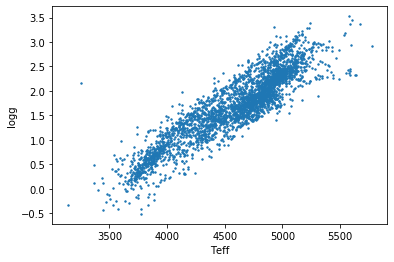

In [6]:
# check that
plt.scatter(Teff3,logg3,s=2)
plt.xlabel('Teff')
plt.ylabel('logg')
plt.show()

In [7]:
mask_disc = (E2<-8000)&(fe_h2>-10)&(si_fe2>-10)&(Teff2<6000)&(Teff2>4000)&(logg2<3.6)&(Lz2>0.5)&(logg2>2.)
mask_halo = (E2>-7500)&(Lz2<0.5)&(Lz2>-1)&(fe_h2>-10)&(si_fe2>-10)&(Teff2<6000)&(Teff2>4000)&(logg2<3.6)
mask_highe = (E2>50000)&(Lz2<0)&(E2<100000)
feh_disc = fe_h2[mask_disc]
sife_disc = si_fe2[mask_disc]
print(np.shape(feh_disc))
feh_halo = fe_h2[mask_halo]
sife_halo = si_fe2[mask_halo]
print(np.shape(feh_halo))
feh_highe = fe_h2[mask_highe]
sife_highe = si_fe2[mask_highe]
print(np.shape(sife_highe))

xpoly_disc,ypoly_disc, coeffs_disc,poly_disc = fit_func(feh_disc,sife_disc,5)

xpoly_halo,ypoly_halo, coeffs_halo,poly_halo = fit_func(feh_halo,sife_halo,3)

(135547,)
(761,)
(769,)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RankWarning: Polyfit may be poorly conditioned
  


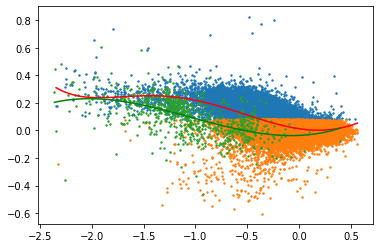

In [8]:
plt.scatter(feh_disc[sife_disc>0.08],sife_disc[sife_disc>0.08],s=2)
plt.scatter(feh_disc[sife_disc<0.08],sife_disc[sife_disc<0.08],s=2)
plt.scatter(feh_halo,sife_halo,s=2)
plt.plot(xpoly_disc,ypoly_disc,'r-')
plt.plot(xpoly_halo,ypoly_halo,'g-')
plt.show()

In [68]:
# save the halo ids
ids_halo = ids2[mask_halo]
print(len(ids_halo))

np.savetxt('../haloids_Gcpaper.txt',ids_halo,delimiter=" ",fmt='%s')

761


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


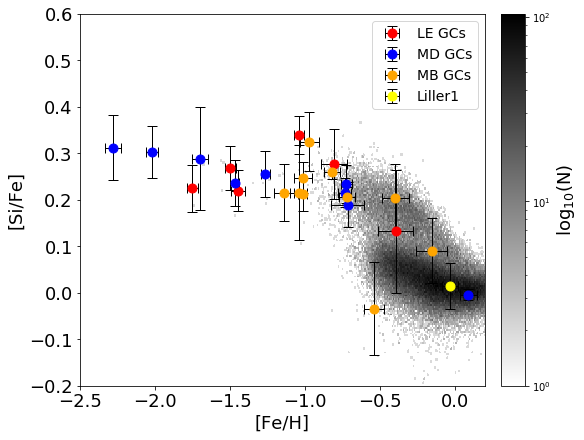

In [10]:
# mask1 = (fe_h>-10)&(si_fe>-10)&(Teff<=6000)
mask1 = (fe_h>-10)&(si_fe>-10)&(logg>-9000)&(logg<3.6)
fe_h1 = fe_h[mask1]
si_fe1 = si_fe[mask1]
mg_fe1 = mg_fe[mask1]
ca_fe1 = ca_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')])]
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(si_fe1[np.where(gc_name1=='NGC6809')]),np.mean(si_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6121')]),np.mean(si_fe1[np.where(gc_name1=='NGC6441')]),\
         np.mean(si_fe1[np.where(gc_name1=='NGC6544')]),np.mean(si_fe1[np.where(gc_name1=='Pal6')])]

#      np.mean(si_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(si_fe1[np.where(gc_name1=='NGC6809')]),np.std(si_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(si_fe1[np.where(gc_name1=='NGC6121')]),np.std(si_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6544')]),np.std(si_fe1[np.where(gc_name1=='Pal6')])]
#         np.std(si_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]

ys_ge = [np.mean(si_fe1[np.where(gc_name1=='NGC362')]),np.mean(si_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC1904')]),np.mean(si_fe1[np.where(gc_name1=='NGC2808')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6341')]),np.mean(si_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC6205')]),np.mean(si_fe1[np.where(gc_name1=='NGC7089')])]

xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]

yerrs_ge = [np.std(si_fe1[np.where(gc_name1=='NGC362')]),np.std(si_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(si_fe1[np.where(gc_name1=='NGC1904')]),np.std(si_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(si_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(si_fe1[np.where(gc_name1=='NGC6341')]),np.std(si_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(si_fe1[np.where(gc_name1=='NGC6205')]),np.std(si_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')])]
ys_seq = [np.mean(si_fe1[np.where(gc_name1=='NGC5466')]),np.mean(si_fe1[np.where(gc_name1=='NGC3201')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')])]
yerrs_seq = [np.std(si_fe1[np.where(gc_name1=='NGC5466')]),np.std(si_fe1[np.where(gc_name1=='NGC3201')])]

# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6218')])]

ys_md = [np.mean(si_fe1[np.where(gc_name1=='NGC104')]),np.mean(si_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(si_fe1[np.where(gc_name1=='Pal10')]),np.mean(si_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6760')]),np.mean(si_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6656')]),np.mean(si_fe1[np.where(gc_name1=='NGC6752')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC6218')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC6218')])]

yerrs_md = [np.std(si_fe1[np.where(gc_name1=='NGC104')]),np.std(si_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(si_fe1[np.where(gc_name1=='Pal10')]),np.std(si_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6760')]),np.std(si_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6656')]),np.std(si_fe1[np.where(gc_name1=='NGC6752')]),\
           np.std(si_fe1[np.where(gc_name1=='NGC6218')])]

# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan2')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(si_fe1[np.where(gc_name1=='NGC6522')]),np.mean(si_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(si_fe1[np.where(gc_name1=='HP1')]),np.mean(si_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6388')]),np.mean(si_fe1[np.where(gc_name1=='Terzan2')]),\
              np.mean(si_fe1[np.where(gc_name1=='NGC6723')]),np.mean(si_fe1[np.where(gc_name1=='NGC6540')]),\
         np.mean(si_fe1[np.where(gc_name1=='NGC6539')]),np.mean(si_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan2')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6540')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC6539')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(si_fe1[np.where(gc_name1=='NGC6522')]),np.std(si_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(si_fe1[np.where(gc_name1=='HP1')]),np.std(si_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6388')]),np.std(si_fe1[np.where(gc_name1=='Terzan2')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6723')]),np.std(si_fe1[np.where(gc_name1=='NGC6540')]),\
            np.std(si_fe1[np.where(gc_name1=='NGC6539')]),np.std(si_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(si_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(si_fe1[np.where(gc_name1=='NGC6715')])]

# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]

ys_h = [np.mean(si_fe1[np.where(gc_name1=='NGC5024')]),np.mean(si_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(si_fe1[np.where(gc_name1=='NGC4590')]),np.mean(si_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(si_fe1[np.where(gc_name1=='NGC5272')]),np.mean(si_fe1[np.where(gc_name1=='Pal5')])]

xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]

yerrs_h = [np.std(si_fe1[np.where(gc_name1=='NGC5024')]),np.std(si_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(si_fe1[np.where(gc_name1=='NGC4590')]),np.std(si_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(si_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(si_fe1[np.where(gc_name1=='NGC5272')]),np.std(si_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(si_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(si_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(si_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(si_fe1[np.where(gc_name1=='Liller1')])]

# # UKS1
# xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
# ys_uk = [np.mean(si_fe1[np.where(gc_name1=='UKS1')])]
# xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
# yerrs_uk = [np.std(si_fe1[np.where(gc_name1=='UKS1')])]

# 6388
xs_6388= [np.mean(fe_h1[np.where(gc_name1=='NGC6388')])]
ys_6388 = [np.mean(si_fe1[np.where(gc_name1=='NGC6388')])]
xerrs_6388 = [np.std(fe_h1[np.where(gc_name1=='NGC6388')])]
yerrs_6388 = [np.std(si_fe1[np.where(gc_name1=='NGC6388')])]


import matplotlib.gridspec as grid
import statsmodels.api as sm
from matplotlib.colors import LogNorm

lows = sm.nonparametric.lowess

fig = plt.figure(constrained_layout=True,figsize=(8,6))
# gs = grid.GridSpec(1,1)
# ax = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1])

plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o',markersize=9, color='red',ecolor='black', elinewidth=1, capsize=5,\
             label='LE GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,markersize=9,fmt='o', color='blue',ecolor='black', elinewidth=1, capsize=5,\
             label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,markersize=9,fmt='o', color='orange',ecolor='black', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o',markersize=9, color='yellow',ecolor='black', elinewidth=1, capsize=5,\
             label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o',markersize=7, color='magenta',ecolor='black', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Si/Fe]',fontsize=18)
plt.xlabel('[Fe/H]',fontsize=18)
plt.tick_params(labelsize=18)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.hist2d(feh_disc,sife_disc,bins=350,cmap='binary',label='MW Disc-Bulge',cmin=0.5,norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label(r'log$_{10}$(N)',fontsize=18)
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
# ax.scatter(feh_disc,sife_disc,s=2,c='grey',label='MW Disc-Bulge',alpha=0.2)
# data = lows(sife_disc,feh_disc,it=2)
# ax.plot(data[:,0],data[:,1],c='darkorchid')
# ax.fill_between(data[:,0],data[:,1]+np.std(data[:,1]),data[:,1]-np.std(data[:,1]),color='darkorchid',alpha=0.2)
# ax.plot(xpoly_disc,ypoly_disc,linewidth= 4,c='darkorchid')
# ax.fill_between(xpoly_disc,ypoly_disc+np.std(ypoly_disc),ypoly_disc-np.std(ypoly_disc),color='darkorchid',alpha=0.2)
plt.legend(loc='upper right',fontsize=14)


# ax2.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='black', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # # plt.plot(xpoly_le,ypoly_le,'r-')
# ax2.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='black', elinewidth=1, capsize=5,\
#              label='MD GCs')
# # plt.plot(xpoly_md,ypoly_md,'b-')
# ax2.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='black', elinewidth=1, capsize=5,\
#              label='MB GCs')
# ax2.set_ylabel('[Si/Fe]')
# # ax.xlabel('[Fe/H]')
# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax2.legend(loc='upper right')
# ax2.set_xlim(-2.5,0.2)
# ax2.set_ylim(-.2,.6)
# ax2.scatter(feh_disc,sife_disc,s=2,c='grey',label='MW Disc',alpha=0.4)

# gs.update(wspace=0.,hspace=0.)
plt.savefig('/Users/danny/Desktop/apogee-gc/plots/in_situ_all.pdf', format='pdf', dpi=400, bbox_inches='tight')



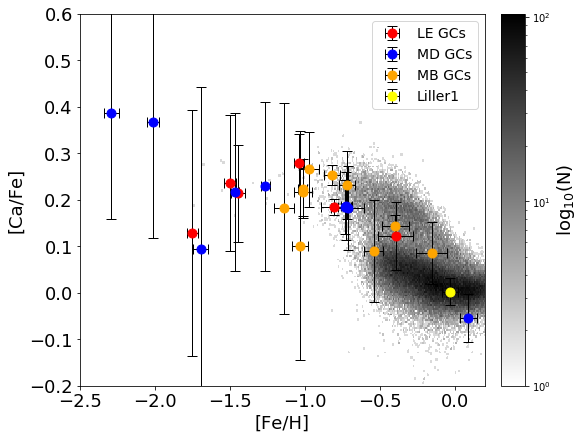

In [106]:
# mask1 = (fe_h>-10)&(ca_fe>-10)&(Teff<=6000)
mask1 = (fe_h>-10)&(ca_fe>-10)&(logg>-9000)&(logg<3.6)
fe_h1 = fe_h[mask1]
ca_fe1 = ca_fe[mask1]
mg_fe1 = mg_fe[mask1]
ca_fe1 = ca_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')])]
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(ca_fe1[np.where(gc_name1=='NGC6809')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6121')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6441')]),\
         np.mean(ca_fe1[np.where(gc_name1=='NGC6544')]),np.mean(ca_fe1[np.where(gc_name1=='Pal6')])]

#      np.mean(ca_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(ca_fe1[np.where(gc_name1=='NGC6809')]),np.std(ca_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(ca_fe1[np.where(gc_name1=='NGC6121')]),np.std(ca_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6544')]),np.std(ca_fe1[np.where(gc_name1=='Pal6')])]
#         np.std(ca_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]

ys_ge = [np.mean(ca_fe1[np.where(gc_name1=='NGC362')]),np.mean(ca_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC1904')]),np.mean(ca_fe1[np.where(gc_name1=='NGC2808')]),\
    np.mean(ca_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6341')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(ca_fe1[np.where(gc_name1=='NGC6205')]),np.mean(ca_fe1[np.where(gc_name1=='NGC7089')])]

xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]

yerrs_ge = [np.std(ca_fe1[np.where(gc_name1=='NGC362')]),np.std(ca_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(ca_fe1[np.where(gc_name1=='NGC1904')]),np.std(ca_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(ca_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(ca_fe1[np.where(gc_name1=='NGC6341')]),np.std(ca_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(ca_fe1[np.where(gc_name1=='NGC6205')]),np.std(ca_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')])]
ys_seq = [np.mean(ca_fe1[np.where(gc_name1=='NGC5466')]),np.mean(ca_fe1[np.where(gc_name1=='NGC3201')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')])]
yerrs_seq = [np.std(ca_fe1[np.where(gc_name1=='NGC5466')]),np.std(ca_fe1[np.where(gc_name1=='NGC3201')])]

# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6218')])]

ys_md = [np.mean(ca_fe1[np.where(gc_name1=='NGC104')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(ca_fe1[np.where(gc_name1=='Pal10')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6760')]),np.mean(ca_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6656')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6752')]),\
        np.mean(ca_fe1[np.where(gc_name1=='NGC6218')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC6218')])]

yerrs_md = [np.std(ca_fe1[np.where(gc_name1=='NGC104')]),np.std(ca_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(ca_fe1[np.where(gc_name1=='Pal10')]),np.std(ca_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6760')]),np.std(ca_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6656')]),np.std(ca_fe1[np.where(gc_name1=='NGC6752')]),\
           np.std(ca_fe1[np.where(gc_name1=='NGC6218')])]

# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan2')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(ca_fe1[np.where(gc_name1=='NGC6522')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(ca_fe1[np.where(gc_name1=='HP1')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(ca_fe1[np.where(gc_name1=='NGC6388')]),np.mean(ca_fe1[np.where(gc_name1=='Terzan2')]),\
              np.mean(ca_fe1[np.where(gc_name1=='NGC6723')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6540')]),\
         np.mean(ca_fe1[np.where(gc_name1=='NGC6539')]),np.mean(ca_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan2')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6540')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC6539')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(ca_fe1[np.where(gc_name1=='NGC6522')]),np.std(ca_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(ca_fe1[np.where(gc_name1=='HP1')]),np.std(ca_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6388')]),np.std(ca_fe1[np.where(gc_name1=='Terzan2')]),\
        np.std(ca_fe1[np.where(gc_name1=='NGC6723')]),np.std(ca_fe1[np.where(gc_name1=='NGC6540')]),\
            np.std(ca_fe1[np.where(gc_name1=='NGC6539')]),np.std(ca_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(ca_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(ca_fe1[np.where(gc_name1=='NGC6715')])]

# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]

ys_h = [np.mean(ca_fe1[np.where(gc_name1=='NGC5024')]),np.mean(ca_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(ca_fe1[np.where(gc_name1=='NGC4590')]),np.mean(ca_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(ca_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(ca_fe1[np.where(gc_name1=='NGC5272')]),np.mean(ca_fe1[np.where(gc_name1=='Pal5')])]

xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]

yerrs_h = [np.std(ca_fe1[np.where(gc_name1=='NGC5024')]),np.std(ca_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(ca_fe1[np.where(gc_name1=='NGC4590')]),np.std(ca_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(ca_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(ca_fe1[np.where(gc_name1=='NGC5272')]),np.std(ca_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(ca_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(ca_fe1[np.where(gc_name1=='NGC5904')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(ca_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(ca_fe1[np.where(gc_name1=='Liller1')])]

# # UKS1
# xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
# ys_uk = [np.mean(ca_fe1[np.where(gc_name1=='UKS1')])]
# xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
# yerrs_uk = [np.std(ca_fe1[np.where(gc_name1=='UKS1')])]

# 6388
xs_6388= [np.mean(fe_h1[np.where(gc_name1=='NGC6388')])]
ys_6388 = [np.mean(ca_fe1[np.where(gc_name1=='NGC6388')])]
xerrs_6388 = [np.std(fe_h1[np.where(gc_name1=='NGC6388')])]
yerrs_6388 = [np.std(ca_fe1[np.where(gc_name1=='NGC6388')])]


import matplotlib.gridspec as grid
import statsmodels.api as sm
from matplotlib.colors import LogNorm

lows = sm.nonparametric.lowess

fig = plt.figure(constrained_layout=True,figsize=(8,6))
# gs = grid.GridSpec(1,1)
# ax = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1])

plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o',markersize=9, color='red',ecolor='black', elinewidth=1, capsize=5,\
             label='LE GCs')
# # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,markersize=9,fmt='o', color='blue',ecolor='black', elinewidth=1, capsize=5,\
             label='MD GCs')
# plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,markersize=9,fmt='o', color='orange',ecolor='black', elinewidth=1, capsize=5,\
             label='MB GCs')
plt.errorbar(xs_l,ys_l,xerr = xerrs_l,yerr= yerrs_l,fmt='o',markersize=9, color='yellow',ecolor='black', elinewidth=1, capsize=5,\
             label='Liller1')
# plt.errorbar(xs_uk,ys_uk,xerr = xerrs_uk,yerr= yerrs_uk,fmt='o',markersize=7, color='magenta',ecolor='black', elinewidth=1, capsize=5,\
#              label='UKS1')
plt.ylabel('[Ca/Fe]',fontsize=18)
plt.xlabel('[Fe/H]',fontsize=18)
plt.tick_params(labelsize=18)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.hist2d(feh_disc,sife_disc,bins=350,cmap='binary',label='MW Disc-Bulge',cmin=0.5,norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label(r'log$_{10}$(N)',fontsize=18)
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
# ax.scatter(feh_disc,sife_disc,s=2,c='grey',label='MW Disc-Bulge',alpha=0.2)
# data = lows(sife_disc,feh_disc,it=2)
# ax.plot(data[:,0],data[:,1],c='darkorchid')
# ax.fill_between(data[:,0],data[:,1]+np.std(data[:,1]),data[:,1]-np.std(data[:,1]),color='darkorchid',alpha=0.2)
# ax.plot(xpoly_disc,ypoly_disc,linewidth= 4,c='darkorchid')
# ax.fill_between(xpoly_disc,ypoly_disc+np.std(ypoly_disc),ypoly_disc-np.std(ypoly_disc),color='darkorchid',alpha=0.2)
plt.legend(loc='upper right',fontsize=14)


# ax2.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='black', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # # plt.plot(xpoly_le,ypoly_le,'r-')
# ax2.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='black', elinewidth=1, capsize=5,\
#              label='MD GCs')
# # plt.plot(xpoly_md,ypoly_md,'b-')
# ax2.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='black', elinewidth=1, capsize=5,\
#              label='MB GCs')
# ax2.set_ylabel('[Si/Fe]')
# # ax.xlabel('[Fe/H]')
# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax2.legend(loc='upper right')
# ax2.set_xlim(-2.5,0.2)
# ax2.set_ylim(-.2,.6)
# ax2.scatter(feh_disc,sife_disc,s=2,c='grey',label='MW Disc',alpha=0.4)

# gs.update(wspace=0.,hspace=0.)
# plt.savefig('/Users/qpasa/Desktop/Papers/Paper2/paper_plots/in_situ_all.pdf', format='pdf', dpi=400, bbox_inches='tight')




In [68]:
# accreted
ys_accreted = np.array([np.mean(si_fe1[np.where(gc_name1=='NGC362')]),np.mean(si_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC1904')]),np.mean(si_fe1[np.where(gc_name1=='NGC2808')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC288')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC6205')]),np.mean(si_fe1[np.where(gc_name1=='NGC7089')]),\
                 np.mean(si_fe1[np.where(gc_name1=='NGC3201')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC5272')]),\
                       np.mean(si_fe1[np.where(gc_name1=='Pal5')])])

print(np.mean(ys_accreted),np.std(ys_accreted))

ys_insitu = np.array([np.mean(si_fe1[np.where(gc_name1=='NGC6522')]),\
     np.mean(si_fe1[np.where(gc_name1=='HP1')]),\
              np.mean(si_fe1[np.where(gc_name1=='NGC6723')]),np.mean(si_fe1[np.where(gc_name1=='NGC6540')]),\
                     np.mean(si_fe1[np.where(gc_name1=='NGC104')]),np.mean(si_fe1[np.where(gc_name1=='NGC6397')]),\
np.mean(si_fe1[np.where(gc_name1=='NGC7078')]),np.mean(si_fe1[np.where(gc_name1=='NGC6752')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC6218')])])

print(np.mean(ys_insitu),np.std(ys_insitu))


0.17185582 0.048256192
0.24782552 0.035066854


In [70]:
ys_ge = [np.mean(si_fe1[np.where(gc_name1=='NGC362')]),np.mean(si_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC1904')]),np.mean(si_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6341')]),np.mean(si_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC6205')])]
mgfes_ge = [np.mean(mg_fe1[np.where(gc_name1=='NGC362')]),np.mean(mg_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC1904')]),np.mean(mg_fe1[np.where(gc_name1=='NGC2808')]),\
     np.mean(mg_fe1[np.where(gc_name1=='NGC6341')]),np.mean(mg_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(mg_fe1[np.where(gc_name1=='NGC6205')])]

ca_fe2 = ca_fe1[ca_fe1>-10]
gc_name2 = gc_name1[ca_fe1>-10]
cafes_ge = [np.mean(ca_fe2[np.where((gc_name2=='NGC362'))]),np.mean(ca_fe2[np.where(gc_name2=='NGC1851')]),\
     np.mean(ca_fe2[np.where(gc_name2=='NGC1904')]),np.mean(ca_fe2[np.where(gc_name2=='NGC2808')]),\
     np.mean(ca_fe2[np.where(gc_name2=='NGC6341')]),np.mean(ca_fe2[np.where(gc_name2=='NGC6229')]),\
    np.mean(ca_fe2[np.where(gc_name2=='NGC6205')])]
print(np.mean(cafes_ge),np.std(cafes_ge))
# print(np.mean(si_fe1[np.where(gc_name1=='NGC288')]))
print(np.mean(ca_fe2[np.where(gc_name2=='NGC288')]),np.std(ca_fe2[np.where(gc_name2=='NGC288')]))
print('mgs')
print(np.mean(mgfes_ge),np.std(mgfes_ge))
print(np.mean(mg_fe1[np.where(gc_name2=='NGC288')]),np.std(mg_fe1[np.where(gc_name2=='NGC288')]))




0.19206712 0.044747453
0.26335979 0.08778917
mgs
0.1872421 0.09933388
0.32013485 0.03589291


In [73]:
print(np.mean(ca_fe2[np.where(gc_name2=='NGC6388')]),np.std(ca_fe2[np.where(gc_name2=='NGC6388')]))
print(np.mean([np.mean(ca_fe2[np.where(gc_name2=='NGC6539')]),np.mean(ca_fe2[np.where(gc_name2=='NGC6380')])]),np.std([np.std(ca_fe2[np.where(gc_name2=='NGC6539')]),np.std(ca_fe2[np.where(gc_name2=='NGC6380')])]))

print(np.mean(mg_fe1[np.where(gc_name2=='NGC6388')]),np.std(mg_fe1[np.where(gc_name2=='NGC6388')]))
print(np.mean([np.mean(mg_fe1[np.where(gc_name2=='NGC6539')]),np.mean(mg_fe1[np.where(gc_name2=='NGC6380')])]),np.std([np.std(mg_fe1[np.where(gc_name2=='NGC6539')]),np.std(mg_fe1[np.where(gc_name2=='NGC6380')])]))




0.08972663 0.110065356
0.18858959 0.024532098
0.16855752 0.16079518
0.20953101 0.014483295


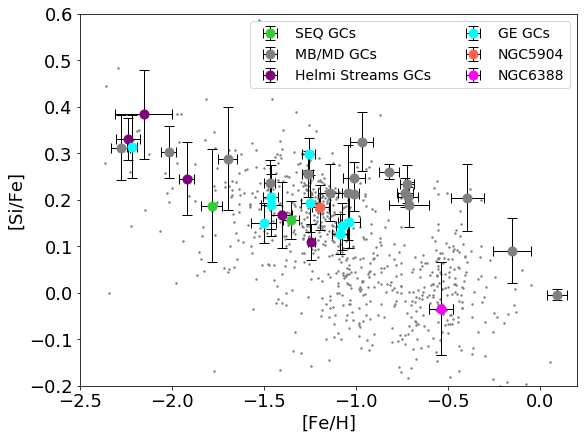

In [11]:
# mask1 = (fe_h>-10)&(si_fe>-10)&(Teff<=6000)
mask1 = (fe_h>-10)&(si_fe>-10)&(logg>-9000)&(logg<3.6)
fe_h1 = fe_h[mask1]
si_fe1 = si_fe[mask1]
gc_name1 = gc_name[mask1]

# L-E GCs
xs_le = [np.mean(fe_h1[np.where(gc_name1=='NGC6809')]),np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6121')]),np.mean(fe_h1[np.where(gc_name1=='NGC6441')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6544')]),np.mean(fe_h1[np.where(gc_name1=='Pal6')])]
#     np.mean(fe_h1[np.where(gc_name1=='NGC6712')])]
ys_le = [np.mean(si_fe1[np.where(gc_name1=='NGC6809')]),np.mean(si_fe1[np.where(gc_name1=='NGC6254')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6121')]),np.mean(si_fe1[np.where(gc_name1=='NGC6441')]),\
         np.mean(si_fe1[np.where(gc_name1=='NGC6544')]),np.mean(si_fe1[np.where(gc_name1=='Pal6')])]

#      np.mean(si_fe1[np.where(gc_name1=='NGC6712')])]
xerrs_le = [np.std(fe_h1[np.where(gc_name1=='NGC6809')]),np.std(fe_h1[np.where(gc_name1=='NGC6254')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC6121')]),np.std(fe_h1[np.where(gc_name1=='NGC6441')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6544')]),np.std(fe_h1[np.where(gc_name1=='Pal6')])]
#         np.std(fe_h1[np.where(gc_name1=='NGC6712')])]
yerrs_le = [np.std(si_fe1[np.where(gc_name1=='NGC6809')]),np.std(si_fe1[np.where(gc_name1=='NGC6254')]),\
     np.std(si_fe1[np.where(gc_name1=='NGC6121')]),np.std(si_fe1[np.where(gc_name1=='NGC6441')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6544')]),np.std(si_fe1[np.where(gc_name1=='Pal6')])]
#         np.std(si_fe1[np.where(gc_name1=='NGC6712')])]
# GE
xs_ge = [np.mean(fe_h1[np.where(gc_name1=='NGC362')]),np.mean(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC1904')]),np.mean(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6341')]),np.mean(fe_h1[np.where(gc_name1=='NGC6229')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),np.mean(fe_h1[np.where(gc_name1=='NGC7089')])]

ys_ge = [np.mean(si_fe1[np.where(gc_name1=='NGC362')]),np.mean(si_fe1[np.where(gc_name1=='NGC1851')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC1904')]),np.mean(si_fe1[np.where(gc_name1=='NGC2808')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6341')]),np.mean(si_fe1[np.where(gc_name1=='NGC6229')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC6205')]),np.mean(si_fe1[np.where(gc_name1=='NGC7089')])]

xerrs_ge = [np.std(fe_h1[np.where(gc_name1=='NGC362')]),np.std(fe_h1[np.where(gc_name1=='NGC1851')]),\
     np.std(fe_h1[np.where(gc_name1=='NGC1904')]),np.std(fe_h1[np.where(gc_name1=='NGC2808')]),\
    np.std(fe_h1[np.where(gc_name1=='NGC288')]),\
       np.std(fe_h1[np.where(gc_name1=='NGC6341')]),np.std(fe_h1[np.where(gc_name1=='NGC6229')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC6205')]),np.std(fe_h1[np.where(gc_name1=='NGC7089')])]

yerrs_ge = [np.std(si_fe1[np.where(gc_name1=='NGC362')]),np.std(si_fe1[np.where(gc_name1=='NGC1851')]),\
     np.std(si_fe1[np.where(gc_name1=='NGC1904')]),np.std(si_fe1[np.where(gc_name1=='NGC2808')]),\
    np.std(si_fe1[np.where(gc_name1=='NGC288')]),\
      np.std(si_fe1[np.where(gc_name1=='NGC6341')]),np.std(si_fe1[np.where(gc_name1=='NGC6229')]),\
           np.std(si_fe1[np.where(gc_name1=='NGC6205')]),np.std(si_fe1[np.where(gc_name1=='NGC7089')])]
# SEQ
xs_seq = [np.mean(fe_h1[np.where(gc_name1=='NGC5466')]),np.mean(fe_h1[np.where(gc_name1=='NGC3201')])]
ys_seq = [np.mean(si_fe1[np.where(gc_name1=='NGC5466')]),np.mean(si_fe1[np.where(gc_name1=='NGC3201')])]
xerrs_seq = [np.std(fe_h1[np.where(gc_name1=='NGC5466')]),np.std(fe_h1[np.where(gc_name1=='NGC3201')])]
yerrs_seq = [np.std(si_fe1[np.where(gc_name1=='NGC5466')]),np.std(si_fe1[np.where(gc_name1=='NGC3201')])]

# MD
xs_md = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.mean(fe_h1[np.where(gc_name1=='Pal10')]),np.mean(fe_h1[np.where(gc_name1=='NGC6838')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6760')]),np.mean(fe_h1[np.where(gc_name1=='NGC7078')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6656')]),np.mean(fe_h1[np.where(gc_name1=='NGC6752')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC6218')])]

ys_md = [np.mean(si_fe1[np.where(gc_name1=='NGC104')]),np.mean(si_fe1[np.where(gc_name1=='NGC6397')]),\
     np.mean(si_fe1[np.where(gc_name1=='Pal10')]),np.mean(si_fe1[np.where(gc_name1=='NGC6838')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6760')]),np.mean(si_fe1[np.where(gc_name1=='NGC7078')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6656')]),np.mean(si_fe1[np.where(gc_name1=='NGC6752')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC6218')])]

xerrs_md = [np.std(fe_h1[np.where(gc_name1=='NGC104')]),np.std(fe_h1[np.where(gc_name1=='NGC6397')]),\
     np.std(fe_h1[np.where(gc_name1=='Pal10')]),np.std(fe_h1[np.where(gc_name1=='NGC6838')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6760')]),np.std(fe_h1[np.where(gc_name1=='NGC7078')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6656')]),np.std(fe_h1[np.where(gc_name1=='NGC6752')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC6218')])]

yerrs_md = [np.std(si_fe1[np.where(gc_name1=='NGC104')]),np.std(si_fe1[np.where(gc_name1=='NGC6397')]),\
     np.std(si_fe1[np.where(gc_name1=='Pal10')]),np.std(si_fe1[np.where(gc_name1=='NGC6838')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6760')]),np.std(si_fe1[np.where(gc_name1=='NGC7078')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6656')]),np.std(si_fe1[np.where(gc_name1=='NGC6752')]),\
           np.std(si_fe1[np.where(gc_name1=='NGC6218')])]

# MB
xs_mb = [np.mean(fe_h1[np.where(gc_name1=='NGC6522')]),np.mean(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.mean(fe_h1[np.where(gc_name1=='HP1')]),np.mean(fe_h1[np.where(gc_name1=='NGC6380')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC6388')]),np.mean(fe_h1[np.where(gc_name1=='Terzan2')]),\
             np.mean(fe_h1[np.where(gc_name1=='NGC6723')]),np.mean(fe_h1[np.where(gc_name1=='NGC6540')]),\
         np.mean(fe_h1[np.where(gc_name1=='NGC6539')]),np.mean(fe_h1[np.where(gc_name1=='NGC6553')])]

ys_mb = [np.mean(si_fe1[np.where(gc_name1=='NGC6522')]),np.mean(si_fe1[np.where(gc_name1=='NGC6171')]),\
     np.mean(si_fe1[np.where(gc_name1=='HP1')]),np.mean(si_fe1[np.where(gc_name1=='NGC6380')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC6388')]),np.mean(si_fe1[np.where(gc_name1=='Terzan2')]),\
              np.mean(si_fe1[np.where(gc_name1=='NGC6723')]),np.mean(si_fe1[np.where(gc_name1=='NGC6540')]),\
         np.mean(si_fe1[np.where(gc_name1=='NGC6539')]),np.mean(si_fe1[np.where(gc_name1=='NGC6553')])]

xerrs_mb = [np.std(fe_h1[np.where(gc_name1=='NGC6522')]),np.std(fe_h1[np.where(gc_name1=='NGC6171')]),\
     np.std(fe_h1[np.where(gc_name1=='HP1')]),np.std(fe_h1[np.where(gc_name1=='NGC6380')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6388')]),np.std(fe_h1[np.where(gc_name1=='Terzan2')]),\
        np.std(fe_h1[np.where(gc_name1=='NGC6723')]),np.std(fe_h1[np.where(gc_name1=='NGC6540')]),\
            np.std(fe_h1[np.where(gc_name1=='NGC6539')]),np.std(fe_h1[np.where(gc_name1=='NGC6553')])]

yerrs_mb = [np.std(si_fe1[np.where(gc_name1=='NGC6522')]),np.std(si_fe1[np.where(gc_name1=='NGC6171')]),\
     np.std(si_fe1[np.where(gc_name1=='HP1')]),np.std(si_fe1[np.where(gc_name1=='NGC6380')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6388')]),np.std(si_fe1[np.where(gc_name1=='Terzan2')]),\
        np.std(si_fe1[np.where(gc_name1=='NGC6723')]),np.std(si_fe1[np.where(gc_name1=='NGC6540')]),\
            np.std(si_fe1[np.where(gc_name1=='NGC6539')]),np.std(si_fe1[np.where(gc_name1=='NGC6553')])]
# Sag
xs_sag = [np.mean(fe_h1[np.where(gc_name1=='NGC6715')])]
ys_sag = [np.mean(si_fe1[np.where(gc_name1=='NGC6715')])]
xerrs_sag = [np.std(fe_h1[np.where(gc_name1=='NGC6715')])]
yerrs_sag = [np.std(si_fe1[np.where(gc_name1=='NGC6715')])]

# Helmi Streams
xs_h = [np.mean(fe_h1[np.where(gc_name1=='NGC5024')]),np.mean(fe_h1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),np.mean(fe_h1[np.where(gc_name1=='Rup106')]),\
        np.mean(fe_h1[np.where(gc_name1=='NGC4590')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC5272')]),np.mean(fe_h1[np.where(gc_name1=='Pal5')])]

ys_h = [np.mean(si_fe1[np.where(gc_name1=='NGC5024')]),np.mean(si_fe1[np.where(gc_name1=='NGC5053')]),\
#        np.mean(si_fe1[np.where(gc_name1=='NGC4590')]),np.mean(si_fe1[np.where(gc_name1=='Rup106')]),\
        np.mean(si_fe1[np.where(gc_name1=='NGC4590')]),\
       np.mean(si_fe1[np.where(gc_name1=='NGC5272')]),np.mean(si_fe1[np.where(gc_name1=='Pal5')])]

xerrs_h = [np.std(fe_h1[np.where(gc_name1=='NGC5024')]),np.std(fe_h1[np.where(gc_name1=='NGC5053')]),\
#           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),np.std(fe_h1[np.where(gc_name1=='Rup106')]),\
           np.std(fe_h1[np.where(gc_name1=='NGC4590')]),\
          np.std(fe_h1[np.where(gc_name1=='NGC5272')]),np.std(fe_h1[np.where(gc_name1=='Pal5')])]

yerrs_h = [np.std(si_fe1[np.where(gc_name1=='NGC5024')]),np.std(si_fe1[np.where(gc_name1=='NGC5053')]),\
#           np.std(si_fe1[np.where(gc_name1=='NGC4590')]),np.std(si_fe1[np.where(gc_name1=='Rup106')]),\
           np.std(si_fe1[np.where(gc_name1=='NGC4590')]),\
          np.std(si_fe1[np.where(gc_name1=='NGC5272')]),np.std(si_fe1[np.where(gc_name1=='Pal5')])]
# NGC5904
xs_un = [np.mean(fe_h1[np.where(gc_name1=='NGC5904')])]
ys_un = [np.mean(si_fe1[np.where(gc_name1=='NGC5904')])]
xerrs_un = [np.std(fe_h1[np.where(gc_name1=='NGC5904')])]
yerrs_un = [np.std(si_fe1[np.where(gc_name1=='NGC5904')])]

# NGC6388
xs_63 = [np.mean(fe_h1[np.where(gc_name1=='NGC6388')])]
ys_63 = [np.mean(si_fe1[np.where(gc_name1=='NGC6388')])]
xerrs_63 = [np.std(fe_h1[np.where(gc_name1=='NGC6388')])]
yerrs_63 = [np.std(si_fe1[np.where(gc_name1=='NGC6388')])]

# Liller1
xs_l = [np.mean(fe_h1[np.where(gc_name1=='Liller1')])]
ys_l = [np.mean(si_fe1[np.where(gc_name1=='Liller1')])]
xerrs_l = [np.std(fe_h1[np.where(gc_name1=='Liller1')])]
yerrs_l = [np.std(si_fe1[np.where(gc_name1=='Liller1')])]

# # UKS1
# xs_uk = [np.mean(fe_h1[np.where(gc_name1=='UKS1')])]
# ys_uk = [np.mean(si_fe1[np.where(gc_name1=='UKS1')])]
# xerrs_uk = [np.std(fe_h1[np.where(gc_name1=='UKS1')])]
# yerrs_uk = [np.std(si_fe1[np.where(gc_name1=='UKS1')])]

# 6388
xs_6388= [np.mean(fe_h1[np.where(gc_name1=='NGC6388')])]
ys_6388 = [np.mean(si_fe1[np.where(gc_name1=='NGC6388')])]
xerrs_6388 = [np.std(fe_h1[np.where(gc_name1=='NGC6388')])]
yerrs_6388 = [np.std(si_fe1[np.where(gc_name1=='NGC6388')])]


import matplotlib.gridspec as grid
import statsmodels.api as sm
from matplotlib.colors import LogNorm

lows = sm.nonparametric.lowess

fig = plt.figure(constrained_layout=True,figsize=(8,6))
# gs = grid.GridSpec(1,1)
# ax = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1])

plt.errorbar(xs_seq,ys_seq,xerr = xerrs_seq,yerr= yerrs_seq,fmt='o',markersize=9, color='limegreen',ecolor='black', elinewidth=1, capsize=5,\
             label='SEQ GCs')
# plt.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # # plt.plot(xpoly_le,ypoly_le,'r-')
plt.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o',markersize=9, color='grey',ecolor='black', elinewidth=1, capsize=5)
# # # # plt.plot(xpoly_md,ypoly_md,'b-')
plt.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o',markersize=9, color='grey',ecolor='black', elinewidth=1, capsize=5,\
             label='MB/MD GCs')
# plt.plot(xpoly_mb,ypoly_mb,'-',c='orange')
# plt.errorbar(xs_sag,ys_sag,xerr = xerrs_sag,yerr= yerrs_sag,fmt='o', color='pink',ecolor='darkgrey', elinewidth=1, capsize=5,\
#              label='Sag GCs')
plt.errorbar(xs_h,ys_h,xerr = xerrs_h,yerr= yerrs_h,fmt='o',markersize=9, color='purple',ecolor='black', elinewidth=1, capsize=5,\
             label='Helmi Streams GCs')
plt.errorbar(xs_ge,ys_ge,xerr = xerrs_ge,yerr= yerrs_ge,fmt='o',markersize=9, color='cyan',ecolor='black', elinewidth=1, capsize=5,\
             label='GE GCs')
# plt.plot(xpoly_hel,ypoly_hel,'-',c='purple')
plt.errorbar(xs_un,ys_un,xerr = xerrs_un,yerr= yerrs_un,fmt='o',markersize=9, color='tomato',ecolor='black', elinewidth=1, capsize=5,\
             label='NGC5904')
plt.errorbar(xs_6388,ys_6388,xerr = xerrs_6388,yerr= yerrs_6388,fmt='o',markersize=9, color='magenta',ecolor='black', elinewidth=1, capsize=5,\
             label=r'NGC6388')
plt.ylabel('[Si/Fe]',fontsize=18)
plt.xlabel('[Fe/H]',fontsize=18)
plt.tick_params(labelsize=18)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.scatter(feh_halo,sife_halo,s=2,c='grey')
# cbar = plt.colorbar()
# cbar.set_label(r'log$_{10}$(N)',fontsize=14)
plt.xlim(-2.5,0.2)
plt.ylim(-.2,.6)
# ax.scatter(feh_disc,sife_disc,s=2,c='grey',label='MW Disc-Bulge',alpha=0.2)
# data = lows(sife_disc,feh_disc,it=2)
# ax.plot(data[:,0],data[:,1],c='darkorchid')
# ax.fill_between(data[:,0],data[:,1]+np.std(data[:,1]),data[:,1]-np.std(data[:,1]),color='darkorchid',alpha=0.2)
# ax.plot(xpoly_disc,ypoly_disc,linewidth= 4,c='darkorchid')
# ax.fill_between(xpoly_disc,ypoly_disc+np.std(ypoly_disc),ypoly_disc-np.std(ypoly_disc),color='darkorchid',alpha=0.2)
plt.legend(loc='upper right',fontsize=14,ncol=2)


# ax2.errorbar(xs_le,ys_le,xerr = xerrs_le,yerr= yerrs_le,fmt='o', color='red',ecolor='black', elinewidth=1, capsize=5,\
#              label='L-E GCs')
# # # plt.plot(xpoly_le,ypoly_le,'r-')
# ax2.errorbar(xs_md,ys_md,xerr = xerrs_md,yerr= yerrs_md,fmt='o', color='blue',ecolor='black', elinewidth=1, capsize=5,\
#              label='MD GCs')
# # plt.plot(xpoly_md,ypoly_md,'b-')
# ax2.errorbar(xs_mb,ys_mb,xerr = xerrs_mb,yerr= yerrs_mb,fmt='o', color='orange',ecolor='black', elinewidth=1, capsize=5,\
#              label='MB GCs')
# ax2.set_ylabel('[Si/Fe]')
# # ax.xlabel('[Fe/H]')
# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax2.legend(loc='upper right')
# ax2.set_xlim(-2.5,0.2)
# ax2.set_ylim(-.2,.6)
# ax2.scatter(feh_disc,sife_disc,s=2,c='grey',label='MW Disc',alpha=0.4)

# gs.update(wspace=0.,hspace=0.)
plt.savefig('/Users/danny/Desktop/apogee-gc/plots/accreted_all.pdf', format='pdf', dpi=400, bbox_inches='tight')


In [6]:
# load in the precomputed orbit samples
#  the orbit arrays are saved as: E,Jr,Lz,Jz,X,Y,Z,R,phi,z,vx,vy,vz,vR,vT,vZ,
orbits_gc = np.load('/Users/qpasa/Desktop/orbital_modelling/py/samples/orbit_samples_gc.npy',mmap_mode='r+')
# orbits_gc = np.load('/Users/qpasa/Desktop/GC_dissolution/scripts/samples/actions_samples_gc_McMillan_pot.npy',mmap_mode='r+')

print(np.shape(orbits_gc))



(147, 100, 20)


In [7]:
name = ['NGC104(47Tuc)','NGC288','NGC362','Whiting1','NGC1261','Pal1','E1(AM1)',
 'Eridanus','Pal2','NGC1851','NGC1904(M79)','NGC2298','NGC2419','Pyxis',#13
 'NGC2808','E3(ESO37-1)','Pal3','NGC3201','Pal4','Crater(Laevens1)',#19
 'NGC4147','NGC4372','Rup106','NGC4590(M68)','NGC4833','NGC5024(M53)', #25
        
 'NGC5053','NGC5139(omegaCen)','NGC5272(M3)','NGC5286','NGC5466','NGC5634',#31
 'NGC5694','IC4499','NGC5824','Pal5','NGC5897','NGC5904(M5)','NGC5927',#38
 'NGC5946','BH176(ESO224-8)','NGC5986','FSR1716','Pal14(Arp1)',#43
 'BH184(Lynga7)','NGC6093(M80)','NGC6121(M4)','NGC6101','NGC6144',#48
 'NGC6139','Terzan3','NGC6171(M107)','ESO452-11(1636-283)','NGC6205(M13)',#53
 'NGC6229','NGC6218(M12)','FSR1735(2MASS-GC03)','NGC6235','NGC6254(M10)',#58
 'NGC6256','Pal15','NGC6266(M62)','NGC6273(M19)','NGC6284','NGC6287',#64
 'NGC6293','NGC6304','NGC6316','NGC6341(M92)','NGC6325','NGC6333(M9)',#70
        
 'NGC6342','NGC6356','NGC6355','NGC6352','IC1257','Terzan2(HP3)','NGC6366',#77
 'Terzan4(HP4)','BH229(HP1)','NGC6362','NGC6380(Ton1)','Terzan1(HP2)',#82
 'Ton2(Pismis26)','NGC6388','NGC6402(M14)','NGC6401','NGC6397','Pal6',#88
 'NGC6426','Terzan5(Terzan11)','NGC6440','NGC6441','Terzan6(HP5)',#93
 'NGC6453','NGC6496','Terzan9','Djorg2(ESO456-38)','NGC6517','NGC6522',#99
 'NGC6535','NGC6528','NGC6539','NGC6540(Djorg3)','NGC6544','NGC6541',#105
 'ESO280-06','NGC6553','NGC6558','Pal7(IC1276)','Terzan12','NGC6569',#111
 'NGC6584','NGC6624','NGC6626(M28)','NGC6638','NGC6637(M69)','NGC6642',#117
 'NGC6652','NGC6656(M22)','Pal8','NGC6681(M70)','NGC6712','NGC6715(M54)',#123
 'NGC6717(Pal9)','NGC6723','NGC6749','NGC6752','NGC6760','NGC6779(M56)',#129
 'Terzan7','Pal10','Arp2','NGC6809(M55)','Terzan8','Pal11','NGC6838(M71)',#136
 'NGC6864(M75)','NGC6934','NGC6981(M72)','NGC7006','NGC7078(M15)',#141
 'NGC7089(M2)','NGC7099(M30)','Pal12','Pal13','NGC7492'],#146

In [8]:
# take the E and Lz values from the GC samples, and calculate their mean and sigma
E_gc = orbits_gc[:,:,0]
jr_gc = orbits_gc[:,:,1]
lz_gc = orbits_gc[:,:,2]
jz_gc = orbits_gc[:,:,3]



In [9]:
# take the E and Lz values from the GC samples, and calculate their mean and sigma
E_gc = orbits_gc[:,:,0]
jr_gc = orbits_gc[:,:,1]
lz_gc = orbits_gc[:,:,2]
jz_gc = orbits_gc[:,:,3]
e_gc = orbits_gc[:,:,16]



E_mean_gc = np.array([np.mean(i) for i in E_gc])
jr_mean_gc = np.array([np.mean(i) for i in jr_gc])
lz_mean_gc = np.array([np.mean(i) for i in lz_gc])
jz_mean_gc = np.array([np.mean(i) for i in jz_gc])
e_mean_gc = np.array([np.mean(i) for i in e_gc])



E_std_gc = np.array([np.std(i) for i in E_gc])
jr_std_gc = np.array([np.std(i) for i in jr_gc])
lz_std_gc = np.array([np.std(i) for i in lz_gc])
jz_std_gc = np.array([np.std(i) for i in jz_gc])



In [25]:
md_inx = [141,128,136,87,127,131,0,119,55]
mb_inx = [102,51,76,107,100,90,81,99,125,79,103]
ge_inx = [1,2,53,68,142,9,10,14,54]
seq_inx = [30,17,27]
h99_inx = [25,26,23,28,35]
le_inx = [104,133,88,92,46,58]
sag_inx = [123]
ngc5904_inx = [37] 

# # missing Liller 1
total = [141,128,136,87,127,0,119,55,102,51,107,81,99,125,103,1,2,53,68,142,9,10,14,\
         54,30,17,25,26,23,28,104,133,92,46,58,123,37]
total = np.sort(total)
print(np.shape(total))

(37,)


In [12]:
print(np.shape(E_gc))

(147, 100)


In [48]:
# remaining GCs
letternamegcs = [27,84,76,90,35,88,131,79]

In [49]:
lz_percentiles_gc = np.array([np.percentile(i,[16,50,84]) for i in lz_gc[letternamegcs]])
E_percentiles_gc = np.array([np.percentile(i,[16,50,84]) for i in E_gc[letternamegcs]])


In [50]:
low_lz_errs_gc = lz_percentiles_gc[:,1]-lz_percentiles_gc[:,0]
low_E_errs_gc = E_percentiles_gc[:,1]-E_percentiles_gc[:,0]



In [51]:
high_lz_errs_gc = lz_percentiles_gc[:,2]-lz_percentiles_gc[:,1]
high_E_errs_gc = E_percentiles_gc[:,2]-E_percentiles_gc[:,1]



In [53]:
tot_errs = np.vstack((lz_percentiles_gc[:,1],high_lz_errs_gc,low_lz_errs_gc)).T
tot_errs2 = np.vstack((E_percentiles_gc[:,1],high_E_errs_gc,low_E_errs_gc)).T

print(tot_errs2)


[[ -66584.1594329      413.92679155     271.11747422]
 [-101561.3827405     1853.38677997    1486.29802174]
 [-142240.78435551    1564.00011563    1992.21981926]
 [-139676.59858892    2229.6858107     2447.40852264]
 [  -9666.75804933    3131.13566806    2722.12535881]
 [ -96285.73674729    1413.38047687    1744.33919955]
 [ -59725.69295495     733.02303918     648.71877003]
 [-114308.90627868    5219.44549238    3012.79874929]]


In [197]:
# Indices para los GC de mi catalogo de 147 GCs

md_inx = [141,128,136,87,127,131,0,119,55]
mb_inx = [102,51,76,107,90,81,99,125,79,103]
ge_inx = [1,2,53,68,142,9,10,14,54]
seq_inx = [30,17,27]
h99_inx = [25,26,23,28,35]
le_inx = [104,133,88,92,46,58]
sag_inx = [123]
ngc5904_inx = [37] 

mb_E = [E_mean_gc[i] for i in mb_inx]
md_E = [E_mean_gc[i] for i in md_inx]
ge_E = [E_mean_gc[i] for i in ge_inx]
seq_E = [E_mean_gc[i] for i in seq_inx]
h99_E = [E_mean_gc[i] for i in h99_inx]
le_E = [E_mean_gc[i] for i in le_inx]
total_E = [E_mean_gc[i] for i in total]

mb_lz = [lz_mean_gc[i] for i in mb_inx]
md_lz = [lz_mean_gc[i] for i in md_inx]
ge_lz = [lz_mean_gc[i] for i in ge_inx]
seq_lz = [lz_mean_gc[i] for i in seq_inx]
h99_lz = [lz_mean_gc[i] for i in h99_inx]
le_lz = [lz_mean_gc[i] for i in le_inx]
total_lz = [lz_mean_gc[i] for i in total]

mb_jz = [jz_mean_gc[i] for i in mb_inx]
md_jz = [jz_mean_gc[i] for i in md_inx]
ge_jz = [jz_mean_gc[i] for i in ge_inx]
seq_jz = [jz_mean_gc[i] for i in seq_inx]
h99_jz = [jz_mean_gc[i] for i in h99_inx]
le_jz = [jz_mean_gc[i] for i in le_inx]

mb_jr = [jr_mean_gc[i] for i in mb_inx]
md_jr = [jr_mean_gc[i] for i in md_inx]
ge_jr = [jr_mean_gc[i] for i in ge_inx]
seq_jr = [jr_mean_gc[i] for i in seq_inx]
h99_jr = [jr_mean_gc[i] for i in h99_inx]
le_jr = [jr_mean_gc[i] for i in le_inx]

mb_e = [e_mean_gc[i] for i in mb_inx]
md_e = [e_mean_gc[i] for i in md_inx]
ge_e = [e_mean_gc[i] for i in ge_inx]
seq_e = [e_mean_gc[i] for i in seq_inx]
h99_e = [e_mean_gc[i] for i in h99_inx]
le_e = [e_mean_gc[i] for i in le_inx]

print(np.shape(mb_E))

(10,)


In [1]:
print(E_gc)

NameError: name 'E_gc' is not defined

In [221]:
print(E_mean_gc[84],lz_mean_gc[84])

-101441.29825535836 -0.13341082753736488


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2317: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2317: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2317: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are 

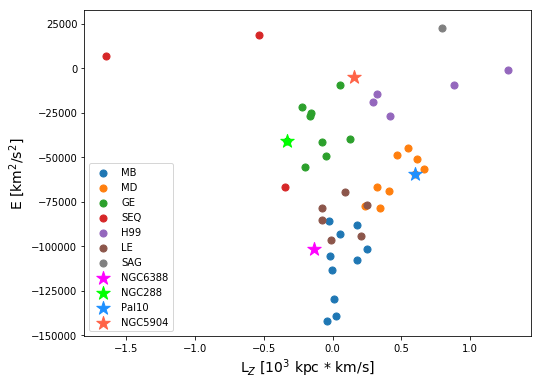

In [202]:
import matplotlib.gridspec as grid

fig = plt.figure(constrained_layout=True,figsize=(8,6))
gs = grid.GridSpec(1,1)
ax = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1])
# ax3 = fig.add_subplot(gs[2])

ax.scatter(mb_lz,mb_E,s=50,label=r'MB')
ax.scatter(md_lz,md_E,s=50,label=r'MD')
ax.scatter(ge_lz,ge_E,s=50,label=r'GE')
ax.scatter(seq_lz,seq_E,s=50,label=r'SEQ')
ax.scatter(h99_lz,h99_E,s=50,label=r'H99')
ax.scatter(le_lz,le_E,s=50,label=r'LE')
ax.scatter(np.nan_to_num(lz_mean_gc[123]),E_mean_gc[123],s=50,label=r'SAG',c='grey')
ax.scatter(lz_mean_gc[84],E_mean_gc[84],marker='*',s=200,label=r'NGC6388',c='magenta')
ax.scatter(lz_mean_gc[1],E_mean_gc[1],marker='*',s=200,label=r'NGC288',c='lime')
ax.scatter(lz_mean_gc[131],E_mean_gc[131],marker='*',s=200,label=r'Pal10',c='dodgerblue')
ax.scatter(lz_mean_gc[37],E_mean_gc[37],marker='*',s=200,label=r'NGC5904',c='tomato')
ax.legend()
# plt.yscale('log')
ax.set_ylabel(r'E [km$^{2}$/s$^{2}$]',fontsize=14)
ax.set_xlabel(r'L$_{Z}$ [10$^{3}$ kpc * km/s]',fontsize=14)
# ax2.scatter(mb_lz,mb_jz,s=50,label=r'MB')
# ax2.scatter(md_lz,md_jz,s=50,label=r'MD')
# ax2.scatter(ge_lz,ge_jz,s=50,label=r'GE')
# ax2.scatter(seq_lz,seq_jz,s=50,label=r'SEQ')
# ax2.scatter(h99_lz,h99_jz,s=50,label=r'H99')
# ax2.scatter(le_lz,le_jz,s=50,label=r'LE')
# ax2.scatter(lz_mean_gc[123],jz_mean_gc[123],s=50,label=r'SAG',c='grey')
# ax2.scatter(lz_mean_gc[84],jz_mean_gc[84],marker='*',s=200,label=r'NGC6388',c='magenta')
# ax2.scatter(lz_mean_gc[1],jz_mean_gc[1],marker='*',s=200,label=r'NGC288',c='lime')
# ax2.scatter(lz_mean_gc[131],jz_mean_gc[131],marker='*',s=200,label=r'Pal10',c='dodgerblue')
# ax2.legend()
# ax2.set_yscale('log')
# ax2.set_ylabel(r'J$_{Z}$',fontsize=14)
# ax2.set_xlabel(r'L$_{Z}$',fontsize=14)
# ax3.scatter(mb_lz,mb_jr,s=50,label=r'MB')
# ax3.scatter(md_lz,md_jr,s=50,label=r'MD')
# ax3.scatter(ge_lz,ge_jr,s=50,label=r'GE')
# ax3.scatter(seq_lz,seq_jr,s=50,label=r'SEQ')
# ax3.scatter(h99_lz,h99_jr,s=50,label=r'H99')
# ax3.scatter(le_lz,le_jr,s=50,label=r'LE')
# ax3.scatter(lz_mean_gc[123],jr_mean_gc[123],s=50,label=r'SAG',c='grey')
# ax3.scatter(lz_mean_gc[84],jr_mean_gc[84],marker='*',s=200,label=r'NGC6388',c='magenta')
# ax3.scatter(lz_mean_gc[1],jr_mean_gc[1],marker='*',s=200,label=r'NGC288',c='lime')
# ax3.legend()
# ax3.set_yscale('log')
# ax3.set_ylabel(r'J$_{R}$')
# ax3.set_xlabel(r'L$_{Z}$')
gs.update(wspace=0.4,hspace=0.)
plt.savefig('/Users/qpasa/Desktop/Papers/Paper2/paper_plots/kinematics.pdf', format='pdf', dpi=400, bbox_inches='tight')




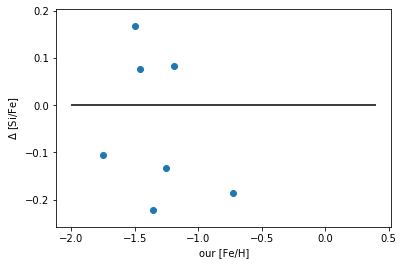

In [84]:
# Pritzl et al 2005 abundances for NGC104,NGC288, NGC3201, NGC6205, NGC6254, NGC5904, NGC6809

pritzl_si = np.array([0.42,0.43,0.38,0.13,0.1,0.1,0.33])
pritzl_fe = np.array([-0.62,-1.39,-1.58,-1.57,-1.52,-1.3,-1.88])

check_si = [np.mean(si_fe1[np.where(gc_name1=='NGC104')]),np.mean(si_fe1[np.where(gc_name1=='NGC288')]),\
     np.mean(si_fe1[np.where(gc_name1=='NGC3201')]),np.mean(si_fe1[np.where(gc_name1=='NGC6205')]),\
    np.mean(si_fe1[np.where(gc_name1=='NGC6254')]),np.mean(si_fe1[np.where(gc_name1=='NGC5904')]),\
       np.mean(si_fe1[np.where(gc_name1=='NGC6809')])]

check_fe = [np.mean(fe_h1[np.where(gc_name1=='NGC104')]),np.mean(fe_h1[np.where(gc_name1=='NGC288')]),\
     np.mean(fe_h1[np.where(gc_name1=='NGC3201')]),np.mean(fe_h1[np.where(gc_name1=='NGC6205')]),\
    np.mean(fe_h1[np.where(gc_name1=='NGC6254')]),np.mean(fe_h1[np.where(gc_name1=='NGC5904')]),\
       np.mean(fe_h1[np.where(gc_name1=='NGC6809')])]

dif_si = check_si-pritzl_si
dif_fe = check_fe-pritzl_fe

plt.scatter(check_fe,dif_si)
plt.xlabel('our [Fe/H]')
plt.ylabel(r'$\Delta$ [Si/Fe]')
plt.hlines(0,-2,0.4)